# L3 Analyse Numérique – TP5

[Le Scornet P](mailto:pierre.le-scornet@ens-rennes.fr) &
[Le Barbenchon P](mailto:pierre.le-barbenchon@ens-rennes.fr). TP ENS Rennes

[Boutin B](mailto:benjamin.boutin@univ-rennes1.fr). Cours et TP Université de Rennes 1 - UFR Mathématiques  

Dans ce TP, nous étudierons des méthodes pour résoudre des équations non-linéaires.

- Exercice 1 : *ordre de convergence de méthodes numériques*
- Exercice 2 : *systèmes d'équations non-linéaires*
- Exercice 3 : *méthode d'homotopie*

In [1]:
import numpy as np
from matplotlib import pyplot as plt

  
Soit $f$ une fonction dérivable et convexe sur un intervalle $[a,b]$. On suppose que l'équation $f(x) = 0$ admet une racine unique $\alpha$ sur l'intervalle $[a,b]$.

#### Méthode de la corde 
On trace la corde $[AB]$ où $A(a,f(a))$ et $B(b,f(b))$. Elle coupe l'axe des abscisses en $C(c_1,0)$. Si $\alpha \in [a,c_1[$, on trace la corde $[AC_1]$ où $C_1(c_1,f(c_1))$. Sinon on trace la corde $[C_1B]$ où $C_1(c_1,f(c_1))$. Puis on itère le procédé.  On construit la suite $(c_k)_{k\in \mathbb N^*}$ qui  converge vers $\alpha$.

#### Méthode de la sécante 
Soit $x_0, x_1 \in [a,b]$. On trace la droite qui passe par $(x_0,f(x_0))$ et $(x_1, f(x_1))$, qui coupe l'axe des abscisses en $x_2$. On trace la droite qui passe par $(x_1,f(x_1))$ et $(x_2, f(x_2))$ qui coupe l'axe des abscisses en $x_3$, etc. On construit la suite $(x_k)_{k\in \mathbb N}$ qui converge vers $\alpha$.

#### Méthode de Newton 
Soit $x_0 \in [a,b]$ tel que $f'(x_0)\neq 0$. On trace la droite tangente à la courbe de $f$ qui passe par $(x_0,f(x_0))$, qui coupe l'axe des abscisses en $x_1$. On trace la droite tangente à la courbe de $f$ qui passe par $(x_1,f(x_1))$, qui coupe l'axe des abscisses en $x_2$,etc. On construit la suite $(x_k)_{k\in \mathbb N}$ qui converge vers $\alpha$.

On peut généraliser cette méthode en dimension supérieure (en utilisant la notion de différentielle).

## Exercice 1 : Ordre de convergence de méthodes numériques

Considérons l'équation suivante, d'inconnue réelle $x$:
\begin{equation}
 \sqrt{1+x^2} = \cosh(x-1).
\end{equation}

### Question 1
À la main, déterminer le nombre de solutions de cette équation. Pour chacune, déterminer numériquement un intervalle de longueur `1` la contenant.

### Question 2
Programmer successivement la méthode de la corde, de la sécante et de Newton pour identifier une valeur approchée aussi précise que possible de chacune des solutions. Dans chacun des cas on considérera 10 itérations.

1.0 -0.0


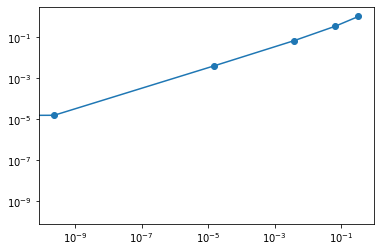

In [60]:
def f(x): return (x - 1) * (x - 2)
def fp(x): return 2*x - 3

def Newton(f, fp, n):
    x = np.zeros(n)
    for k in range(1, n):
        x[k] = x[k-1] - f(x[k-1])/fp(x[k-1])
    return x

x_star = Newton(f, fp, 100)[-1]
print(x_star, f(x_star))

e_N = np.abs(Newton(f, fp, 70) - x_star)
plt.plot(e_N[1:], e_N[:-1], 'o-')
plt.xscale('log')
plt.yscale('log')
plt.show()

Expliquer ce qu'il se produit pour la méthode de la sécante.

`répondre ici`

### Question 3
Pour chacune des méthodes précédentes, stocker les itérations successives et les afficher de sorte à observer à l'œil la croissance effective du nombre de décimales exactes.

### Question 4
Pour tout $k \in \{1, \dots , 10\}$, on note $e_k = \vert x_k-x^\star\vert$, où $x_k$ désigne l'approximation donnée par chaque méthode après $k$ itérations et $x^\star$ est l'approximation donnée par la méthode de Newton après $30$ itérations. Tracer en échelle logarithmique la quantité $e_k$ en abscisse et $ e_{k+1}$ en ordonnée, et quantifier l'ordre de convergence effectif de chaque méthode.

On pourra superposer au tracer les droites de pente $1$, $\tfrac{1+\sqrt{5}}{2}$ et $2$.

## Exercice 2 : Systèmes d'équations linéaires

On souhaite déterminer les points d'intersection dans $\mathbb R^2$ entre les courbes d'équations cartésiennes suivantes:
$$
\left\{\begin{aligned}
    x^2 + 4 y^2 &= 4 \\
    \exp(y+y^2) &= 2+\sin(x)
\end{aligned}\right.
$$


### Question 1
Définir une fonction $F:\mathbb R^2\to \mathbb R^2$ dont les zéros sont les solutions du système précédent et calculer sur le papier sa différentielle en tout point.


$$
F(x,y) = \texttt{écrire votre fonction ici}
$$
$$
dF(x,y) : (h,v) \mapsto \texttt{écrire sa différentielle ici}
$$

Implémenter cette fonction et la matrice jacobienne représentant sa différentielle.

### Question 2
Utiliser la méthode de Newton pour déterminer les zéros de $F$ à partir de la donnée initiale $(x,y)=(1,0)$, puis de la donnée $(x,y)=(-1,0)$. On mènera l'algorithme sur 15 itérations dans chacun des cas.

Tracer les courbes d'erreurs comme dans l'exercice précédent.

## Exercice 3
On considère l'équation suivante dépendant d'un paramètre $\mu \in \mathbb R$, d'inconnue réelle $x(\mu)$:
\begin{equation}
 x \exp(x) = \mu.
\end{equation}

Lorsque $\mu=0$, l'unique solution est $x(0)=0$. Introduisons un petit paramètre $h>0$ de votre choix.

### Question 1
Considérons à présent $\mu= h$, et déterminons la solution $x(h)$ correspondante. Mettre en œuvre la méthode de Newton à partir de l'initialisation $x(0)$ pour déterminer $x(h)$.

### Question 2
Poursuivre la méthode, en augmentant progressivement la valeur du paramètre $\mu$ par pas de $h$, et en obtenant les valeurs de la solution $x(\mu)$ correspondante sur un graphique.

### Question 3
Déterminer également les solutions pour les valeurs du paramètre $\mu\in]-1,0]$.